Code from https://www.inferentialthinking.com/chapters/17/Classification.html was not running.

Code updated by Vitor Kamada

Date: 12/17/2019

In [1]:
import numpy as np
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
data = Table.read_table(path_data + 'ckd.csv')
ckd = data.relabeled('Blood Glucose Random', 'Glucose')
ckd

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1
68,80,1.01,3,2,normal,abnormal,present,present,157,90,4.1,130,6.4,5.6,16,11000,2.6,yes,yes,yes,poor,yes,no,1
61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,148,3.9,135,5.2,7.7,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
48,80,1.025,4,0,normal,abnormal,notpresent,notpresent,95,163,7.7,136,3.8,9.8,32,6900,3.4,yes,no,no,good,no,yes,1
69,70,1.01,3,4,normal,abnormal,notpresent,notpresent,264,87,2.7,130,4,12.5,37,9600,4.1,yes,yes,yes,good,yes,no,1
73,70,1.005,0,0,normal,normal,notpresent,notpresent,70,32,0.9,125,4,10,29,18900,3.5,yes,yes,no,good,yes,no,1
73,80,1.02,2,0,abnormal,abnormal,notpresent,notpresent,253,142,4.6,138,5.8,10.5,33,7200,4.3,yes,yes,yes,good,no,no,1
46,60,1.01,1,0,normal,normal,notpresent,notpresent,163,92,3.3,141,4,9.8,28,14600,3.2,yes,yes,no,good,no,no,1


In [2]:
def standard_units(x):
    return (x - np.mean(x))/np.std(x)

ckd = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count',
     standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class'))
ckd

Hemoglobin,Glucose,White Blood Cell Count,Class
-0.865744,-0.221549,-0.569768,1
-1.45745,-0.947597,1.16268,1
-1.00497,3.84123,-1.27558,1
-2.81488,0.396364,0.809777,1
-2.08395,0.643529,0.232293,1
-1.35303,-0.561402,-0.505603,1
-0.413266,2.04928,0.360623,1
-1.28342,-0.947597,3.34429,1
-1.10939,1.87936,-0.409356,1
-1.35303,0.489051,1.96475,1


In [3]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold'))
ckd = ckd.join('Class', color_table)
ckd

Class,Hemoglobin,Glucose,White Blood Cell Count,Color
0,0.456884,0.133751,0.617283,gold
0,1.153,-0.947597,0.424788,gold
0,0.770138,-0.762223,0.200211,gold
0,0.596108,-0.190654,-0.73018,gold
0,-0.239236,-0.49961,-0.0564489,gold
0,-0.0304002,-0.159758,0.232293,gold
0,0.282854,-0.00527964,0.71353,gold
0,0.108824,-0.623193,0.200211,gold
0,0.0740178,-0.515058,-0.0243664,gold
0,0.83975,-0.422371,-1.33975,gold


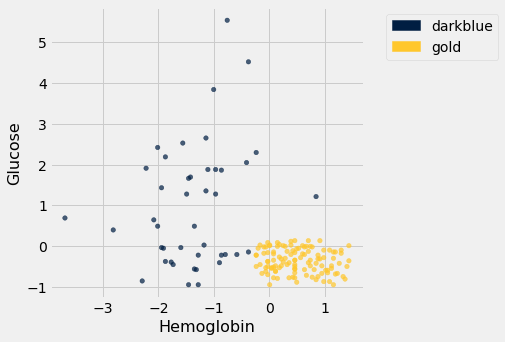

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
ckd.scatter('Hemoglobin', 'Glucose', colors='Color')

In [0]:
def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers)
    and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with 
    the distance from each row to array p."""
    return training.with_column('Distance', 
            all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest 
    rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

In [0]:
def show_closest(point):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    HemoGl = ckd.drop('White Blood Cell Count', 'Color')
    t = closest(HemoGl, point, 1)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    ckd.scatter('Hemoglobin', 'Glucose', colors='Color')
    plt.scatter(point.item(0), point.item(1), color='red', s=30)
    plt.plot(make_array(point.item(0), x_closest),
        make_array(point.item(1), y_closest), color='k', lw=2);

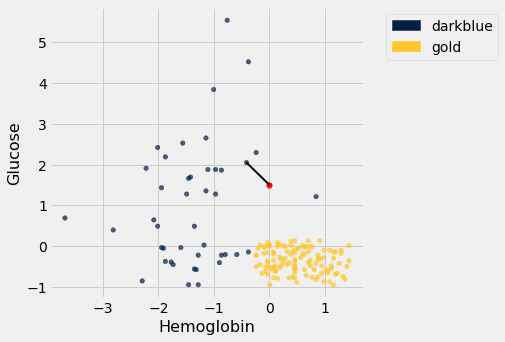

In [7]:
# In this example, Alice's Hemoglobin
# attribute is 0 and her Glucose is 1.5.
alice = make_array(0, 1.5)
show_closest(alice)

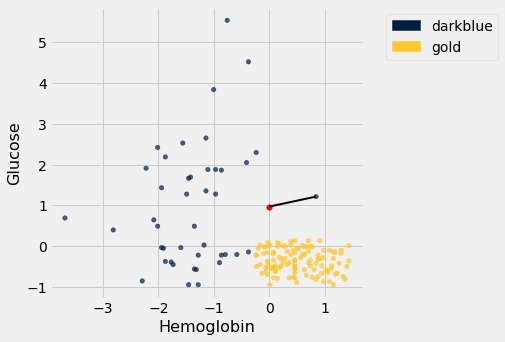

In [8]:
alice = make_array(0, 0.97)
show_closest(alice)

In [0]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 2.1, 0.1):
    for y in np.arange(-2, 2.1, 0.1):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Hemoglobin', x_array,
    'Glucose', y_array)

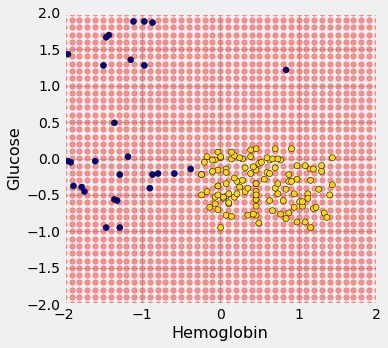

In [10]:
test_grid.scatter('Hemoglobin', 'Glucose',
            color='red', alpha=0.4, s=30)
plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'),
            c=ckd.column('Color'), edgecolor='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2);

In [0]:
def majority(topkclasses):
    """1 if the majority of the "Class" column is 1s, and 0 otherwise."""
    ones = topkclasses.where('Class', are.equal_to(1)).num_rows
    zeros = topkclasses.where('Class', are.equal_to(0)).num_rows
    if ones > zeros:
        return 1
    else:
        return 0

def classify(training, p, k):
    """Classify an example with attributes p using k-nearest
     neighbor classification with the given training table."""
    closestk = closest(training, p, k)
    topkclasses = closestk.select('Class')
    return majority(topkclasses)
    
def classify_grid(training, test, k):
    c = make_array()
    for i in range(test.num_rows):
        c = np.append(c, classify(training,
              make_array(test.row(i)), k))   
    return c

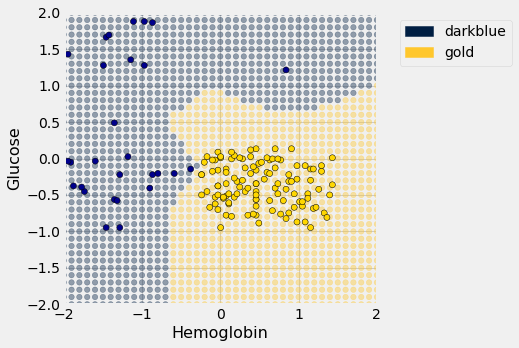

In [12]:
c = classify_grid(ckd.drop('White Blood Cell Count',
                           'Color'), test_grid, 1)
test_grid = test_grid.with_column('Class', 
              c).join('Class', color_table)
test_grid.scatter('Hemoglobin', 'Glucose', 
          colors='Color', alpha=0.4, s=30)
plt.scatter(ckd.column('Hemoglobin'), ckd.column('Glucose'),
            c=ckd.column('Color'), edgecolor='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2);

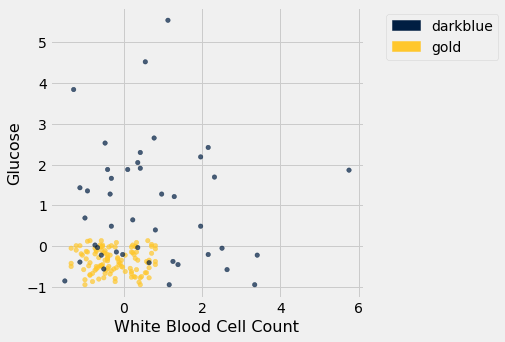

In [13]:
ckd.scatter('White Blood Cell Count',
            'Glucose', colors='Color')

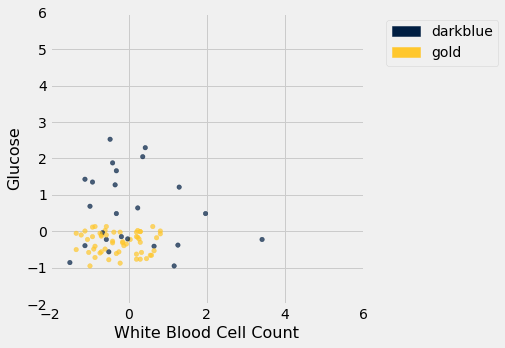

In [14]:
shuffled_ckd = ckd.sample(with_replacement=False)
training = shuffled_ckd.take(np.arange(79))
testing = shuffled_ckd.take(np.arange(79, 158))
training.scatter('White Blood Cell Count', 
                 'Glucose', colors='Color')
plt.xlim(-2, 6)
plt.ylim(-2, 6);

In [0]:
x_array = make_array()
y_array = make_array()
for x in np.arange(-2, 6.1, 0.25):
    for y in np.arange(-2, 6.1, 0.25):
        x_array = np.append(x_array, x)
        y_array = np.append(y_array, y)
        
test_grid = Table().with_columns(
    'Glucose', x_array,
    'White Blood Cell Count', y_array)
c = classify_grid(training.drop('Hemoglobin',
                      'Color'), test_grid, 1)

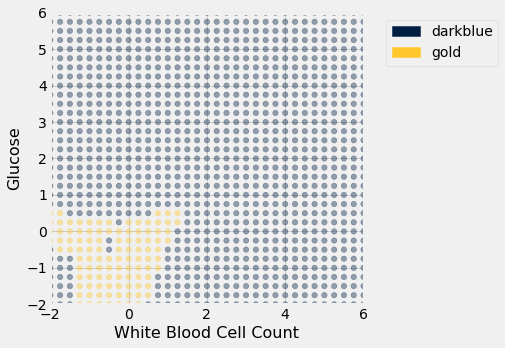

In [16]:
test_grid = test_grid.with_column('Class',
                c).join('Class', color_table)
test_grid.scatter('White Blood Cell Count',
    'Glucose', colors='Color', alpha=0.4, s=30)
plt.xlim(-2, 6)
plt.ylim(-2, 6);

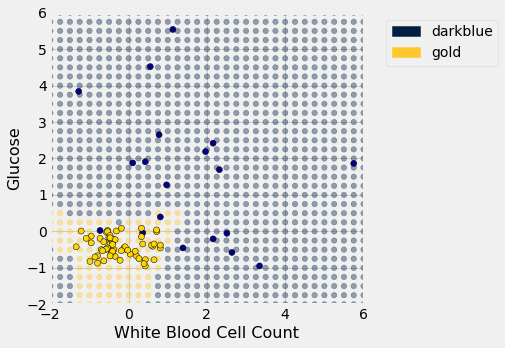

In [17]:
test_grid = test_grid.with_column('Class',
            c).join('Class', color_table)
test_grid.scatter('White Blood Cell Count',
 'Glucose', colors='Color', alpha=0.4, s=30)
plt.scatter(testing.column('White Blood Cell Count'),
  testing.column('Glucose'), c=testing.column('Color'),
   edgecolor='k')
plt.xlim(-2, 6)
plt.ylim(-2, 6);

In [18]:
ckd.row(0)

Row(Class=0, Hemoglobin=0.4568837017159849, Glucose=0.13375085451774507, White Blood Cell Count=0.6172825131401, Color='gold')

In [19]:
ckd.row(0).item(1)

0.4568837017159849

In [20]:
ckd_attributes = ckd.select('Hemoglobin', 'Glucose')
ckd_attributes.row(3)

Row(Hemoglobin=0.5961076648232668, Glucose=-0.19065363034327712)

In [21]:
patient3 = np.array(ckd_attributes.row(3))
alice = make_array(0, 1.1)
alice, patient3

(array([0. , 1.1]), array([ 0.59610766, -0.19065363]))

In [22]:
distance = np.sqrt(np.sum((alice - patient3)**2))
distance

1.421664918881847

In [23]:
t = ckd_attributes.take(np.arange(5))
t

Hemoglobin,Glucose
0.456884,0.133751
1.153,-0.947597
0.770138,-0.762223
0.596108,-0.190654
-0.239236,-0.49961


In [24]:
def max_abs(row):
    return np.max(np.abs(np.array(row)))
max_abs(t.row(4))

0.4996102825918697

In [25]:
t.apply(max_abs)

array([0.4568837 , 1.15300352, 0.77013762, 0.59610766, 0.49961028])

In [0]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

In [0]:
def distance_from_alice(row):
    """Returns distance between Alice and a row of the attributes table"""
    return distance(alice, np.array(row))

In [28]:
distance_from_alice(ckd_attributes.row(3))

1.421664918881847

In [29]:
distances = ckd_attributes.apply(distance_from_alice)
ckd_with_distances = ckd.with_column('Distance from Alice', distances)
ckd_with_distances

Class,Hemoglobin,Glucose,White Blood Cell Count,Color,Distance from Alice
0,0.456884,0.133751,0.617283,gold,1.06882
0,1.153,-0.947597,0.424788,gold,2.34991
0,0.770138,-0.762223,0.200211,gold,2.01519
0,0.596108,-0.190654,-0.73018,gold,1.42166
0,-0.239236,-0.49961,-0.0564489,gold,1.6174
0,-0.0304002,-0.159758,0.232293,gold,1.26012
0,0.282854,-0.00527964,0.71353,gold,1.1409
0,0.108824,-0.623193,0.200211,gold,1.72663
0,0.0740178,-0.515058,-0.0243664,gold,1.61675
0,0.83975,-0.422371,-1.33975,gold,1.73862


In [30]:
sorted_by_distance = ckd_with_distances.sort('Distance from Alice')
sorted_by_distance

Class,Hemoglobin,Glucose,White Blood Cell Count,Color,Distance from Alice
1,0.83975,1.2151,1.29101,darkblue,0.847601
1,-0.970162,1.27689,-0.345191,darkblue,0.986156
0,-0.0304002,0.0874074,-0.184779,gold,1.01305
0,0.14363,0.0874074,0.32854,gold,1.02273
1,-0.413266,2.04928,0.360623,darkblue,1.03534
0,0.387272,0.118303,-0.922675,gold,1.05532
0,0.456884,0.133751,0.617283,gold,1.06882
0,0.178436,0.0410639,0.71353,gold,1.07386
0,0.00440582,0.025616,0.232293,gold,1.07439
0,-0.169624,0.025616,-0.537686,gold,1.08769


In [31]:
alice_5_nearest_neighbors = sorted_by_distance.take(np.arange(5))
alice_5_nearest_neighbors

Class,Hemoglobin,Glucose,White Blood Cell Count,Color,Distance from Alice
1,0.83975,1.2151,1.29101,darkblue,0.847601
1,-0.970162,1.27689,-0.345191,darkblue,0.986156
0,-0.0304002,0.0874074,-0.184779,gold,1.01305
0,0.14363,0.0874074,0.32854,gold,1.02273
1,-0.413266,2.04928,0.360623,darkblue,1.03534


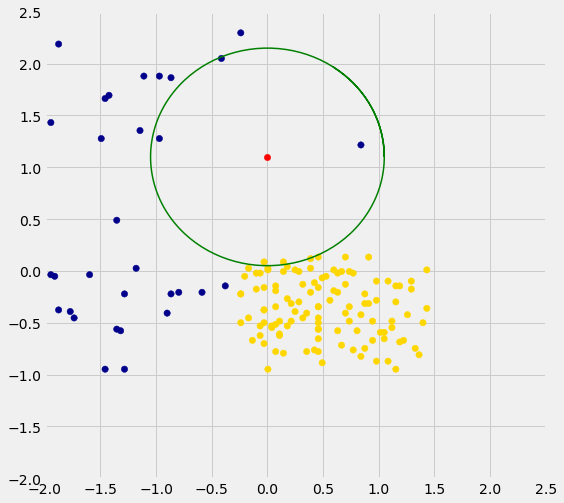

In [32]:
import matplotlib.pyplot as plots
plots.figure(figsize=(8,8))
plots.scatter(ckd.column('Hemoglobin'), 
              ckd.column('Glucose'), c=ckd.column('Color'), s=40)
plots.scatter(alice.item(0), alice.item(1), color='red', s=40)
radius = sorted_by_distance.column('Distance from Alice').item(4)+0.014
theta = np.arange(0, 2*np.pi+1, 2*np.pi/200)
plots.plot(radius*np.cos(theta)+alice.item(0), 
           radius*np.sin(theta)+alice.item(1), color='g', lw=1.5);
plots.xlim(-2, 2.5)
plots.ylim(-2, 2.5);